In [1]:
#from reds_dataset import Reds
from data.vimeo_dataset import VimeoDataset
from models.superresblock import SuperRes
from torch.optim import Adam
from torch import nn
from models.lossfunc import PerceptualLoss
from train import train, test, setup_data
from torchvision.models import vgg16
import cv2

In [2]:
path_to_data = "./"
use_cuda = False

In [3]:
super_res_data = VimeoDataset(path_to_data)

['training_data_1']


In [4]:
model = SuperRes()
if use_cuda:
    model.cuda()

In [5]:
optimizer = Adam(model.parameters(), lr=1e-3) #parameters returns an iterator over the models parameters

In [6]:
vgg = vgg16(pretrained=True)
relu2_2 = nn.Sequential(*list(vgg.features)[:9])
relu2_2.eval()
if use_cuda:
    relu2_2.cuda()

In [7]:
criterion = PerceptualLoss(loss_network=relu2_2)

In [8]:
#gotta write code to visualise some of our data
ftrain = "./"#file path to train
ftest = "./"#file path to test

In [9]:
trainloader_task_2, testloader_task_2 = setup_data(ftrain, ftest, 1,0)


['training_data_1']
['training_data_1']


In [10]:
epochs = 1 #to see if we have no errors, we can set this value to one

In [11]:
for epoch in range(epochs):
    print("Current Epoch: %d" % epoch)
    train(model, trainloader_task_2, optimizer, cuda_enabled=use_cuda)
    test(model, testloader_task_2, cuda_enabled=use_cuda)

Current Epoch: 0


  0%|          | 0/4130 [00:00<?, ?it/s]

training_data_1/dt_train_3679.jpg
(720, 1024, 3) (180, 256, 3)
torch.Size([3, 720, 1024]) torch.Size([3, 180, 256])


/opt/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


2.8245770931243896


Current training loss: 2.8246:   0%|          | 1/4130 [00:23<27:24:34, 23.90s/it]

training_data_1/dt_train_2419.jpg
(720, 1024, 3) (180, 256, 3)
torch.Size([3, 720, 1024]) torch.Size([3, 180, 256])
0.944846510887146


Current training loss: 1.8847:   0%|          | 2/4130 [00:46<26:58:10, 23.52s/it]

training_data_1/dt_train_851.jpg
(720, 1024, 3) (180, 256, 3)
torch.Size([3, 720, 1024]) torch.Size([3, 180, 256])
0.5452322363853455


Current training loss: 1.4382:   0%|          | 3/4130 [01:09<26:38:00, 23.23s/it]

training_data_1/dt_train_2686.jpg
(720, 1024, 3) (180, 256, 3)
torch.Size([3, 720, 1024]) torch.Size([3, 180, 256])
0.6264244318008423


Current training loss: 1.2353:   0%|          | 4/4130 [01:31<26:25:48, 23.06s/it]

training_data_1/dt_train_792.jpg
(720, 1024, 3) (180, 256, 3)
torch.Size([3, 720, 1024]) torch.Size([3, 180, 256])
1.244913935661316


Current training loss: 1.2353:   0%|          | 4/4130 [01:54<32:55:03, 28.72s/it]


KeyboardInterrupt: 

In [12]:
path_to_test_img = "./output.jpg"
x = cv2.imread(path_to_test_img, cv2.IMREAD_COLOR)
x = super_res_data.convert_image_small(x)
print(x)
x = x.unsqueeze(0)
output_test = model(x)

tensor([[[0.0784, 0.1294, 0.2784,  ..., 0.4196, 0.4196, 0.4196],
         [0.3647, 0.4471, 0.4549,  ..., 0.4196, 0.4235, 0.4235],
         [0.4431, 0.4392, 0.4314,  ..., 0.4157, 0.4196, 0.4235],
         ...,
         [0.0392, 0.0471, 0.0431,  ..., 0.1098, 0.0941, 0.0902],
         [0.0314, 0.0353, 0.0353,  ..., 0.0863, 0.0863, 0.0902],
         [0.0510, 0.0431, 0.0314,  ..., 0.1020, 0.0941, 0.1216]],

        [[0.1216, 0.1804, 0.3333,  ..., 0.5137, 0.5137, 0.5137],
         [0.4078, 0.4980, 0.5098,  ..., 0.5137, 0.5176, 0.5176],
         [0.4980, 0.5059, 0.5059,  ..., 0.5098, 0.5098, 0.5137],
         ...,
         [0.0863, 0.0863, 0.0784,  ..., 0.1647, 0.1373, 0.1333],
         [0.0784, 0.0745, 0.0706,  ..., 0.1412, 0.1294, 0.1333],
         [0.0980, 0.0824, 0.0667,  ..., 0.1412, 0.1373, 0.1647]],

        [[0.2078, 0.2667, 0.4196,  ..., 0.6078, 0.6078, 0.6078],
         [0.4941, 0.5843, 0.5961,  ..., 0.6000, 0.5961, 0.5961],
         [0.5843, 0.5882, 0.5882,  ..., 0.5961, 0.5961, 0.

torch.Size([1, 3, 720, 1024])
torch.Size([1, 3, 180, 256])
torch.Size([3, 720, 1024])


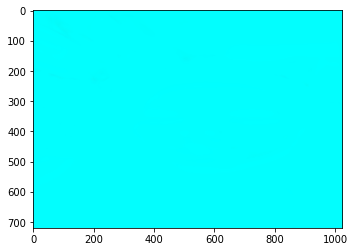

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision.transforms as transforms
print(output_test.shape)
print(x.shape)
for i in output_test:
    print(i.shape)
    plt.imshow(transforms.ToPILImage()(i))
#imgplot = plt.imshow(output_test.detach.numpy())
#plt.imshow(torchvision.transforms.ToPILImage()(output_test), interpolation="bicubic")
#temp = torch.flatten(output_test, start_dim = 2)
#print(temp.shape)
#plt.imshow(output_test.permute(1,2,0))
#plt.imshow(output_test.detach().numpy()[0])

In [ ]:
output_test = model(prep_img(super_res_data[0][0]))